# Part 1 - Data Pre-processing

In [1]:
## file ini di kembangkan berdasarkan file RNN-Copy3-master

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to .csv file location
#dataset_train = pd.read_csv('../5.Liguaria/LiguFinal/hasil/hourly-liguria15.csv', sep=",")
dataset_train = pd.read_csv('Selected_files/Bristol_tem2.csv', sep=";")


epok = 400
mvp = 2727  # 8341
lfd = 720   # 30 days, train dataset
jkj = 72    # jumlah jam kolom
training_set = dataset_train.iloc[mvp-lfd:mvp, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 72 timesteps and 1 output
X_train = []
y_train = []

for i in range(jkj, lfd):  ## jadi geser sesuai panjang 72 dan 720
    X_train.append(training_set_scaled[i-jkj:i, 0])
    y_train.append(training_set_scaled[i, 0])
    if i <= jkj:
        print(X_train)
        print(y_train)
        print()
print('struktur X_train dan y_train: ')
print('============================= ')
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape),print(y_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[array([0.31515152, 0.4       , 0.36363636, 0.27878788, 0.15151515,
       0.13333333, 0.14545455, 0.18181818, 0.18787879, 0.21818182,
       0.13333333, 0.08484848, 0.10909091, 0.16363636, 0.19393939,
       0.21212121, 0.26060606, 0.36363636, 0.43030303, 0.48484848,
       0.47878788, 0.53333333, 0.4969697 , 0.52727273, 0.46666667,
       0.5030303 , 0.48484848, 0.43030303, 0.35757576, 0.31515152,
       0.27878788, 0.29090909, 0.10909091, 0.09090909, 0.1030303 ,
       0.        , 0.07272727, 0.10909091, 0.02424242, 0.02424242,
       0.05454545, 0.19393939, 0.32727273, 0.34545455, 0.44848485,
       0.49090909, 0.45454545, 0.47272727, 0.51515152, 0.53939394,
       0.47878788, 0.44242424, 0.42424242, 0.36363636, 0.34545455,
       0.32727273, 0.32727273, 0.33939394, 0.34545455, 0.38787879,
       0.41212121, 0.42424242, 0.43636364, 0.44848485, 0.45454545,
       0.52121212, 0.56969697, 0.62424242, 0.52727273, 0.52121212,
       0.52121212, 0.50909091])]
[0.5333333333333333]

strukt

In [ ]:
file1 = open("rekap.txt","a")#append mode 
LL = "Struktur berikutnya dgn 2 hidden layer,  sesi 0 \n"
file1.write(LL) 
file1.close() 

# Part 2 - Model

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
activaku = 'tanh'                # sigmoid

## susun struktur jaringan

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 72, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 72, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 24, return_sequences = True))
#regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 24))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1, activation=activaku))

Using TensorFlow backend.


In [3]:
# Pilih settingan 
regressor.compile(optimizer = 'RMSProp', loss = 'mean_absolute_error')

# proses pembelajaran
regressor.fit(X_train, y_train, epochs = epok, batch_size = 72)

Epoch 1/400
648/648 [==============================] - 2s 3ms/step - loss: 0.2347
Epoch 2/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1832
Epoch 3/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1751
Epoch 4/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1716
Epoch 5/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1504
Epoch 6/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1205
Epoch 7/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1135
Epoch 8/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1074
Epoch 9/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1064
Epoch 10/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1017
Epoch 11/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1015
Epoch 12/400
648/648 [==============================] - 1s 2ms/step - loss: 0.1023
Epoch 13/400


648/648 [==============================] - 1s 2ms/step - loss: 0.0530
Epoch 100/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0502
Epoch 101/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0528
Epoch 102/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0512
Epoch 103/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0492
Epoch 104/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0520
Epoch 105/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0507
Epoch 106/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0484
Epoch 107/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0506
Epoch 108/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0496
Epoch 109/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0484
Epoch 110/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0495
Epoch 

648/648 [==============================] - 1s 2ms/step - loss: 0.0399
Epoch 197/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0369
Epoch 198/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0386
Epoch 199/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0394
Epoch 200/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0392
Epoch 201/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0381
Epoch 202/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 203/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0375
Epoch 204/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0371
Epoch 205/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0403
Epoch 206/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0360
Epoch 207/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0393
Epoch 

648/648 [==============================] - 1s 2ms/step - loss: 0.0348
Epoch 294/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0348
Epoch 295/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0364
Epoch 296/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0341
Epoch 297/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0353
Epoch 298/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0345
Epoch 299/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0347
Epoch 300/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0331
Epoch 301/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0349
Epoch 302/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0341
Epoch 303/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0325
Epoch 304/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0339
Epoch 

648/648 [==============================] - 1s 2ms/step - loss: 0.0341
Epoch 391/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0322
Epoch 392/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0332
Epoch 393/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0333
Epoch 394/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0336
Epoch 395/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0339
Epoch 396/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0328
Epoch 397/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0338
Epoch 398/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0316
Epoch 399/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0333
Epoch 400/400
648/648 [==============================] - 1s 2ms/step - loss: 0.0346


# Part 3 - mengisi missing value 

[10.3    9.2    8.     7.7    6.8    6.1    5.3    5.7    7.6    8.9
 11.9   13.2   14.8   16.1   16.4   17.4   17.6   16.8   16.5   15.1
 14.2   13.8   13.1   11.5   10.4    9.6    8.3    7.8    7.3    6.2
  5.7    6.1    7.5    8.9    9.2   10.3   12.1   13.9   14.4   15.5
 15.9   17.3   16.7   15.3   13.4   12.1   11.2   10.     9.2    8.1
  7.     7.3    7.3    7.2    6.4    6.2    8.9    9.8   11.1   11.6
 12.1   13.3   14.3   14.5   14.937 15.109 14.961 14.491 13.722 12.735
 11.641 10.536]



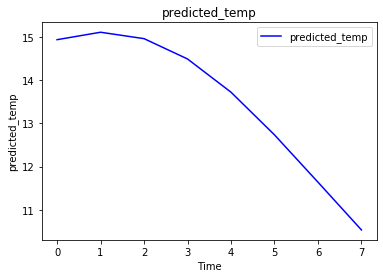

In [4]:
## loop sepanjang missing value

mvn = 8 #  jumlah missing value untuk di prediksi

inpr = dataset_train['temp'][mvp-jkj:mvp].values   # mvp adalah titik missing value pertama


for i in range (mvn):
    inp = inpr.reshape(-1,1)
    inp = sc.transform(inp)
    X1_test = np.array(np.transpose(inp))
    X1_test = np.reshape(X1_test, (X1_test.shape[0], X1_test.shape[1], 1))
    len(X1_test[0]), len(X1_test)

    ## predict with model
    predicted_temp1 = regressor.predict(X1_test)
    ## rescale
    predicted_temp1 = sc.inverse_transform(predicted_temp1)
    ## insert new value to the end of array
    inpb = np.append(inpr, float("{:.3f}".format(predicted_temp1[0][0])))
    ## trim first index, to fit 72 again
    inpbb = np.delete(inpb, 0)
    inpr = inpbb
print(inpr)
print()

# Visualising the results
#plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(inpr[-mvn:], color = 'blue', label = 'predicted_temp')
plt.title('predicted_temp')
plt.xlabel('Time')
plt.ylabel('predicted_temp')
plt.legend()
plt.show()

## Part 3.1 Cari RMSE untuk dibandingkan dgn yang lain

In [5]:
sh = mvn
dsh= dataset_train['temp'][mvp-sh-jkj-24:mvp-24].values
inpku = dsh[:jkj]
#print(dsh)
#print(inpku)
for i in range (sh):
    inprs = inpku.reshape(-1,1)
    inprs = sc.transform(inprs)
    X1s_test = np.array(np.transpose(inprs))
    X1s_test = np.reshape(X1s_test, (X1s_test.shape[0], X1s_test.shape[1], 1))
    len(X1s_test[0]), len(X1s_test)

    ## predict with model
    predicted_temp1s = regressor.predict(X1s_test)
    ## rescale
    predicted_temp1s = sc.inverse_transform(predicted_temp1s)
    ## insert new value to the end of array
    inpbs = np.append(inpku, predicted_temp1s[0][0])
    ## trim first index, to fit 72 again
    inpbbs = np.delete(inpbs, 0)
    inpku = inpbbs
print(inpbbs)
print(len(inpbbs))

[17.3        17.5        17.2        16.9        16.         14.1
 12.9        11.9        11.1        10.7         9.6         8.3
  7.5         6.9         6.1         6.5         8.          9.4
 11.3        12.8        14.7        16.7        17.1        17.8
 18.2        18.         18.         17.5        16.1        14.1
 12.7        11.5        10.3         9.2         8.          7.7
  6.8         6.1         5.3         5.7         7.6         8.9
 11.9        13.2        14.8        16.1        16.4        17.4
 17.6        16.8        16.5        15.1        14.2        13.8
 13.1        11.5        10.4         9.6         8.3         7.8
  7.3         6.2         5.7         6.1         6.53600931  7.46909475
  8.69677734 10.00170517 11.18060303 12.15281296 12.92365837 13.5019083 ]
72


In [6]:
sh = mvn
dsh= dataset_train['temp'][mvp-sh-jkj-24:mvp-24].values
inpku = dsh[:jkj]

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

prediksi = inpbbs[-sh:]
target = dsh[-sh:]
drmse = rmse(prediksi, target )
dr2   = r2_score(prediksi, target)

print('RMSE : ', drmse)
print('R**2 : ', dr2)

# Append-adds at last 
file1 = open("rekap.txt","a")#append mode 
LL = "720, 72, {}, {}, {}, {} \n". format (drmse, dr2, inpr[-9:], epok)
file1.write(LL) 
file1.close() 

RMSE :  1.2936812354550227
R**2 :  0.7101008315799721


In [8]:
print(prediksi)
target

[ 6.53600931  7.46909475  8.69677734 10.00170517 11.18060303 12.15281296
 12.92365837 13.5019083 ]


array([ 7.5,  8.9,  9.2, 10.3, 12.1, 13.9, 14.4, 15.5])

## Plot baru, skenario 2

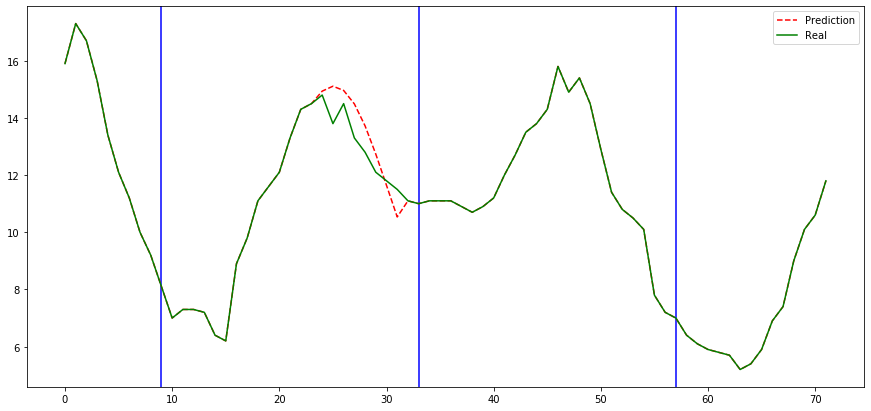

In [9]:
# Untuk skenario pengujian degan MV buatan, perhatikan baris 15 kode, tentang dataset utuh

import matplotlib.pyplot as plt
%matplotlib inline

rantang = 3 # rentang hari 
mulai   = 1 # di mulai x hari sejak mvp
yyp = inpr[-mvn:]

#persiapan untuk plot missing value 
perjam = list()

for i in range (0,8760):
    dda = ( i, dataset_train['temp'][i])   # dataset asli di ganti disini
    dff = list(dda)
    perjam.append(dff)

# generate range untuk plot
zz = []
for i in range(0, 24*rantang):   
    ss = perjam[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    zz.append(ss)   

# isi prediksi missing data
zzp = zz.copy()
k = 0
for i in range (0,len(zzp)):
    cc = pd.isnull(zzp)[i]
    if (cc == True):
        zzp[i]=yyp[k]
        k += 1    

## Data asli
dataset_asli = pd.read_csv('Selected_files/Bristol_temp_asli.csv', sep=";")
perjam_asli = list()
for i in range (0,8760):
    dda = ( i, dataset_asli['temp'][i])   # dataset asli di ganti disini
    dff = list(dda)
    perjam_asli.append(dff) 

plt.figure(figsize=(15,7))
zz_as = []
for i in range(0, 24*rantang):   
    ss  = perjam_asli[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam_asli[(mvp-(24*21))+i][0]        # jika 0 maka indexnya, 1 nilainya
    zz_as.append(ss)
    if (xxx%24 ==0):                             # untuk per 24 jam, garis vertikal biru
        plt.axvline(x=i, color = 'blue')

plt.plot(zzp, color = 'red', linestyle='dashed', label="Prediction" )
plt.plot(zz_as, color = 'green', label="Real")
plt.legend()

In [ ]:
# Untuk skenario pengujian degan MV buatan, perhatikan baris 15 kode, tentang dataset utuh

import matplotlib.pyplot as plt
%matplotlib inline

rantang = 3 # rentang hari 
mulai = 1 # di mulai x hari sejak mvp
#mvp = 2851
yyp = inpr[-mvn:]

#dataset_train['temp'][2851-1:2851+10]
perjam = list()

for i in range (0,8760):
    dda = ( i, dataset_train['temp'][i])   # dataset asli di ganti disini
    dff = list(dda)
    perjam.append(dff)


plt.figure(figsize=(15,5))
zz = []
for i in range(0, 24*rantang):   
    ss=perjam[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam[(mvp-(24*21))+i][0]  # jika 0 maka indexnya, 1 nilainya
    zz.append(ss)
    if (xxx%24 ==0):
        plt.axvline(x=i, color = 'blue')
#print(zz)

## isi prediksi missing data
ccc = list()
zzp = zz.copy()
k = 0
for i in range (0,len(zzp)):
    cc = pd.isnull(zzp)[i]
    if (cc == True):
        zzp[i]=yyp[k]
        k += 1    

plt.plot(zzp, color = 'red',linestyle='dashed' )
plt.plot(zz, color = 'green')
#plt.axhline(y=10.2, color = 'grey')
#plt.axhline(y=8.1, color = 'grey')